In [1]:
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape([x_train.shape[0],-1])
x_test = x_test.reshape([x_test.shape[0],-1])
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


创建神经网络

In [5]:
# 方式1
model = tf.keras.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(784,)))
model.add(layers.Dense(32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal))
model.add(layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dense(10,activation='softmax'))
# 方式2
# model = tf.keras.Sequential([
#     layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(784,)),
#     layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
#     layers.Dense(64, activation='relu', kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     layers.Dense(10, activation='softmax')
# ])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam((0.001)),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 53,706
Trainable params: 53,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)

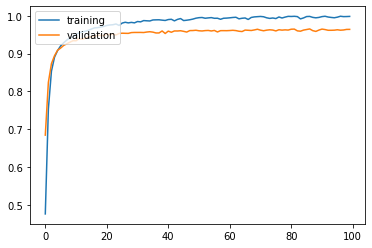

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [12]:
results = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.2464 - accuracy: 0.9650


使用Keras 函数式 API创建神经网络

构建模型

In [ ]:
# input_x = tf.keras.Input(shape=(784,))
# hidden1 = layers.Dense(64, activation='relu',
#                        kernel_initializer='he_normal')(input_x)
# hidden2 = layers.Dense(64, activation='relu',
#                        kernel_initializer='he_normal')(hidden1)
# hidden3 = layers.Dense(64, activation='relu', kernel_initializer='he_normal',
#                        kernel_regularizer=tf.keras.regularizers.l2(0.01))(hidden2)
# output = layers.Dense(10, activation='softmax')(hidden3)
# model2 = tf.keras.Model(inputs=input_x, outputs=output)

模型训练

In [ ]:
# model2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
#                # loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#                loss='sparse_categorical_crossentropy',
#                metrics=['accuracy'])
# history = model2.fit(x_train, y_train, batch_size=256,
#                      epochs=100, validation_split=0.3, verbose=0)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.legend(['training', 'validation'], loc='upper left')
# plt.show()

模型保存

In [ ]:
model.save('model.h5')
model1 = tf.keras.models.load_model('model.h5')
results = model1.evaluate(x_test,y_test)

添加BN和Dropout

论文中给出的是先BN，后面接非线性激活函数。但实际中，也有人主张先非线性激活函数，再是BN。关于这个，大家可以看一下知乎的帖子：https://www.zhihu.com/question/283715823

In [ ]:
model4 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
model4.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model4.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model4.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()